In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
data = pd.read_csv('results.txt')
print(len(data))
data.tail(10)

206


,model,num_epochs,num_train,accuracy
196,deep_cheb_zero,10,10000,0.765833
197,deep_fir_zero,30,1200,0.971667
198,deep_fir_zero,30,1200,0.983750
199,deep_fir_zero,30,1200,0.967500
200,deep_fir_zero,30,1200,0.984167
201,deep_fir,30,1200,0.995833
202,deep_fir,30,1200,1.000000
203,deep_fir_zero,20,600,0.827083
204,deep_fir_zero,20,600,0.852083
205,deep_fir_zero,20,600,0.871250


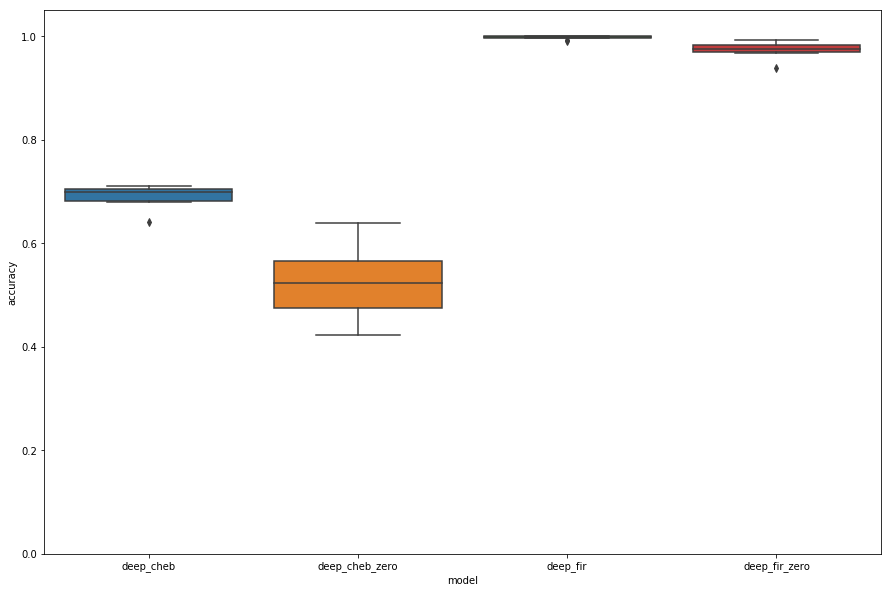

In [126]:
data10 = data[data['num_epochs']==10]
plt.figure(figsize=(15,10))
plt.ylim((0,1.05))
sns.boxplot(x="model", y="accuracy", data=data10[data10['num_train']==2400],whis=1.5);

In [127]:
d2 = data.groupby(['model','num_epochs','num_train']).mean().reset_index()
d2

,model,num_epochs,num_train,accuracy
0,deep_cheb,10,600,0.345792
1,deep_cheb,10,1200,0.505125
2,deep_cheb,10,2400,0.691375
3,deep_cheb,10,4200,0.790875
4,deep_cheb,10,5400,0.826667
5,deep_cheb,10,10000,0.892500
6,deep_cheb,20,600,0.347292
7,deep_cheb,20,1200,0.620417
8,deep_cheb,20,2400,0.752500
9,deep_cheb_zero,10,600,0.261625


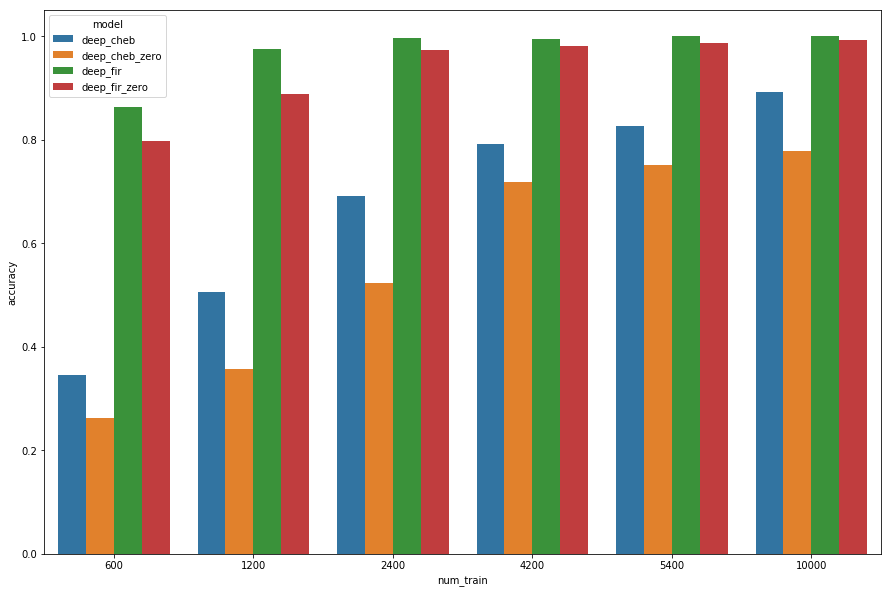

In [128]:
df = pd.DataFrame(d2[d2['num_epochs']==10])
plt.figure(figsize=(15, 10))
sns.barplot(x="num_train", hue="model", y="accuracy", data=df)
plt.show()

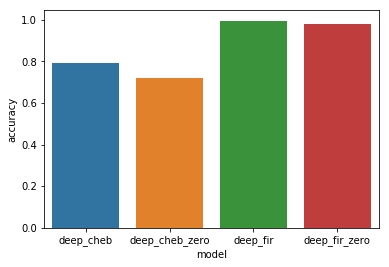

In [129]:
tr = 4200
ep = 10

d3 = d2[d2['num_epochs']==ep]
sns.barplot(d3[d3['num_train']==tr]['model'],d3[d3['num_train']==tr]['accuracy'])

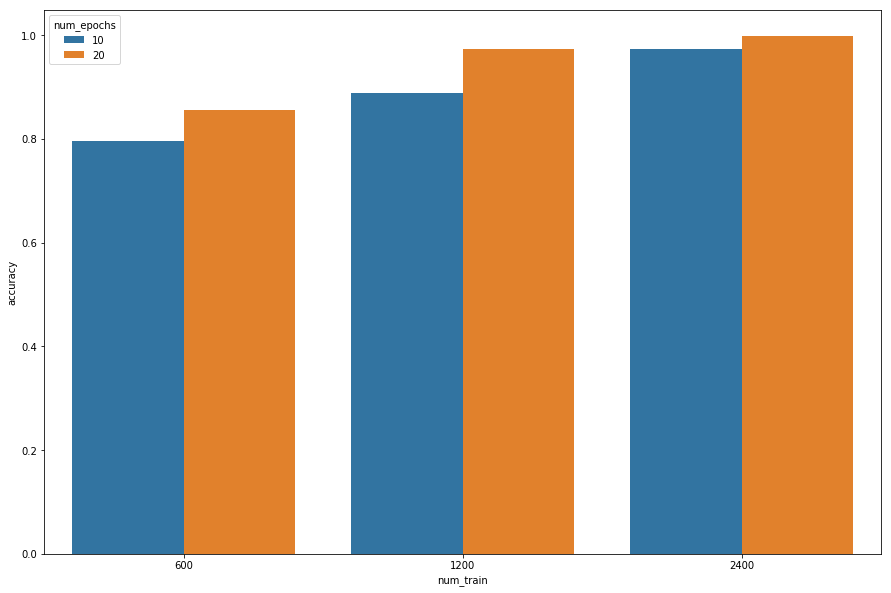

In [130]:
df = pd.DataFrame(d2[d2['model']=='deep_fir_zero'])
df =df[df['num_train']<4000]
df =df[df['num_epochs']<30]
plt.figure(figsize=(15, 10))
sns.barplot(x="num_train", hue="num_epochs", y="accuracy", data=df)
plt.show()

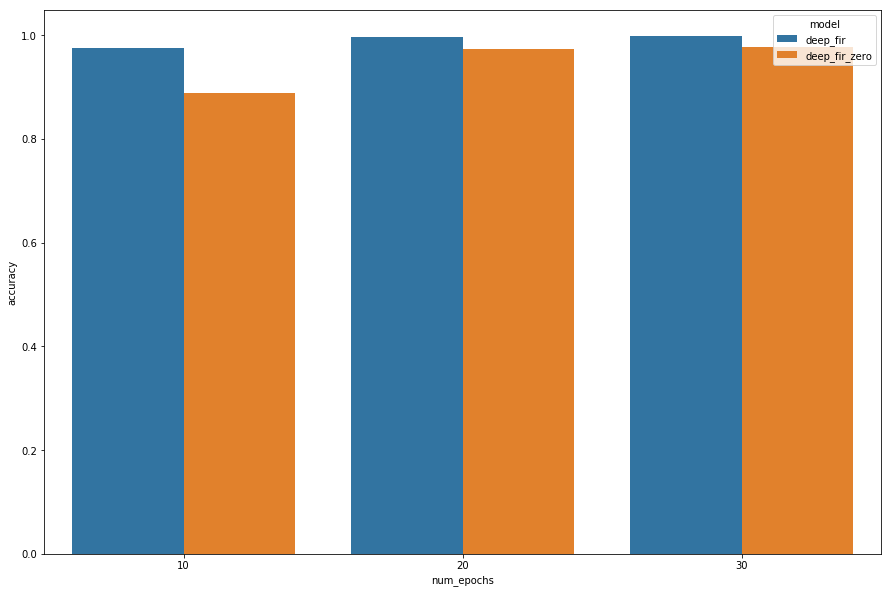

In [131]:
df = pd.DataFrame(d2)
df =df[df['num_train']==1200]
df =df[(df['model']=='deep_fir')|(df['model']=='deep_fir_zero')]
plt.figure(figsize=(15, 10))
sns.barplot(x="num_epochs", hue="model", y="accuracy", data=df)
plt.show()

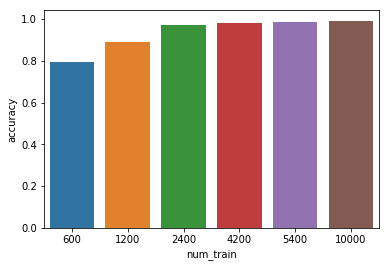

In [132]:
mod = 'deep_fir_zero'
sns.barplot(d3[d3['model']==mod]['num_train'],d3[d3['model']==mod]['accuracy'])

In [133]:
data = pd.read_csv('results2.txt')
data = data[data['model']=='deep_fir']
data = data[data['num_train']==600]
print(len(data))
data.tail(10)

14


,model,num_epochs,num_train,coeff,accuracy
11,deep_fir,10,600,0.01,0.887083
12,deep_fir,10,600,0.10,0.925417
13,deep_fir,10,600,0.01,0.857917
14,deep_fir,10,600,0.10,0.930000
15,deep_fir,10,600,0.01,0.754167
16,deep_fir,10,600,0.10,0.904583
17,deep_fir,10,600,0.50,0.903333
18,deep_fir,10,600,0.01,0.839167
19,deep_fir,10,600,0.10,0.830833
20,deep_fir,10,600,0.50,0.897500


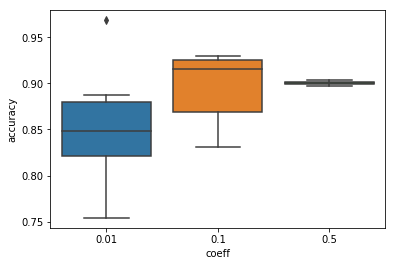

In [134]:
sns.boxplot(data['coeff'].astype(str),data['accuracy'])

19


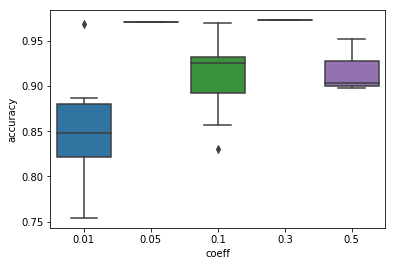

In [137]:
data = pd.read_csv('results2.txt')
data = data[data['model']=='deep_fir']
print(len(data))
sns.boxplot(data['coeff'].astype(str),data['accuracy'])

In [136]:
data = pd.read_csv('epidemicsres.txt').reset_index().drop('model',axis=1)
data.columns = ['Experiment','Model','Accuracy']
data['Model']=data['Model']
data.tail(20)

,Experiment,Model,Accuracy
16,Gaussian_1.5,fir,7839249
17,Gaussian_1.5,fir,7989249
18,Gaussian_1.5,cheb,7919249
19,Gaussian_1.5,cheb,7249249
20,Gaussian_1.5,cheb,7449249
21,Gaussian_1.5,cheb,7449249
22,Gaussian_1.5,cheb,8149249
23,Uniform,fir,8539836
24,Uniform,fir,8738734
25,Uniform,fir,8638233


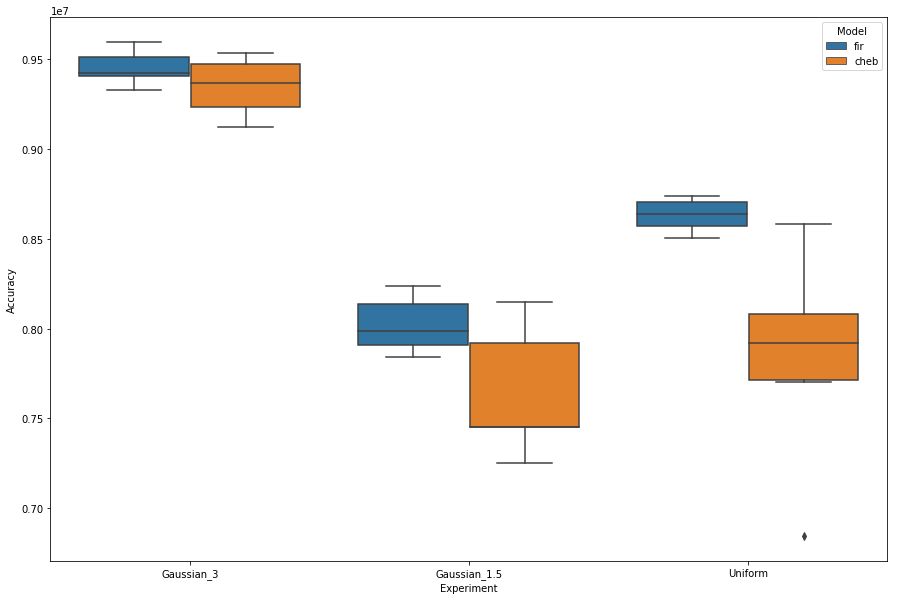

In [119]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Experiment', hue="Model", y="Accuracy", data=data)
plt.show()